In [306]:
ClearAll["Global`*"];
{brown,green,beige,blue}=RGBColor/@{"#df405a","#87314e","#512645","#311e3e"};
<<"MaTeX`";

(* parameters *)
nu=0.9 (* heat conductivity *);
SimTime=480.;
BoxSize=2;
{tMin,tMax}={0,SimTime} (* time *);
{xMin,xMax}={-BoxSize/2.,BoxSize/2.} (* x coordinate *);
xgr=256;dx=BoxSize/(xgr-1)*128;
tgr=2048;dt=SimTime/(tgr-1);
std=0.3; (* sigma of the random variable *)

In [318]:
xGrid=Range[xMin,xMax,dx];
phi0={};
For[i=1,i<=xgr,i++,
  AppendTo[phi0,Exp[-(i-xgr/2)^2/400]]
];
phi=phi0;
results={phi};

1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[---], AbsoluteThickness[2], 
                                                            120
 
>       RGBColor[0.87451, 0.25098, 0.352941]], 
 
                            1
>      Directive[PointSize[---], AbsoluteThickness[2], 
                           120
 
>       RGBColor[0.529412, 0.192157, 0.305882]], 
 
                            1
>      Directive[PointSize[---], AbsoluteThickness[2], 
                           120
 
>       RGBColor[0.317647, 0.14902, 0.270588]]}, {τ=0, τ=50, τ=240}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True}, LabelStyle -> {}, LegendLayout -> Column], 
 
>    {Right, Top}, Identity]]
Burgers_shock_241203.pdf
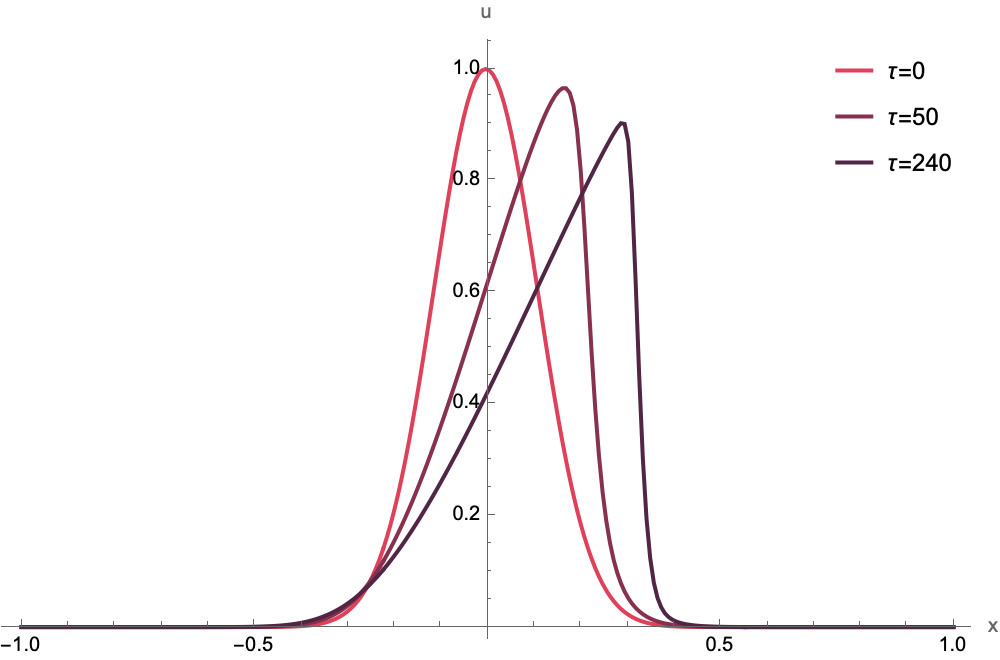
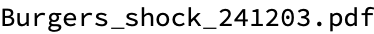

In [371]:
For[t=1,t<=200,t++,
  phiNew=phi;
  For[i=2,i<=xgr-1,i++,
    phiNew[[i]]=phi[[i]]-phi[[i]]*(phi[[i+1]]-phi[[i]])*dt/dx+nu*dt/dx^2*(phi[[i-1]]-2*phi[[i]]+phi[[i+1]]);
  ];
  phiNew[[1]]=phi[[1]]-phi[[1]]*(phi[[2]]-phi[[1]])*dt/dx+nu*dt/dx^2*(phi[[xgr-1]]-2*phi[[1]]+phi[[2]]);
  phiNew[[xgr]]=phiNew[[1]];
  phi=phiNew;
  AppendTo[results,phi];
];

graph2=ListLinePlot[{results[[1]],results[[100]],results[[199]]},DataRange->{xMin,xMax},PlotRange->All,PlotStyle->{brown,green,beige},ImageSize->500,PlotLegends->Placed[LineLegend[{"\[Tau]=0","\[Tau]=50","\[Tau]=240"}],{Right,Top}],AxesLabel->{"x","u"}];
graph22=Plot[hom,{x,xMin,xMax},AxesLabel->{"x",Subscript["\[Psi]","ini"]},BaseStyle->{FontSize->12,FontFamily->"Latin Modern Roman"},ImageSize->500,PlotRange->{-1,5},PlotStyle->{Dashed,blue}];

Show[graph2,graph22]
Export["Burgers_shock_241203.pdf",%]